In [1]:
class TSuccess(object):
  def __init__(self):
    self.wins = 0
    self.totals = 0
    self.a = 1
    self.b = 1

  def sample(self):
    self.a += (1 + self.wins)
    self.b += (1 + self.totals - self.wins)
#     print(a,b)
    return np.random.beta(self.a, self.b)
    
  def add_win(self):
    self.wins += 1
    
  def add_total(self):
    self.totals += 1
        

In [2]:
import pandas as pd
import numpy as np
import sys,os
import glob
# %matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf

# startdate = '2019-01-01'
# enddate = '2019-09-19'

# path = './OutputData/'+ensembles[ensembleix]+'/worker_0/fig/'
path = '../../experiments/phase4/notes/OutputData/RLA3CNet_88pct/worker_0/fig_20190919/'
# indexpath = path + 'KS11_result/KS11'
# indexpath = path + '005930_삼성전자_result/005930_삼성전자'
title = '021240_코웨이'
indexpath = path + title+'_result/'+title

# indexpath = path + '/DJI_result/DJI'
df_data = pd.read_pickle(indexpath)


In [3]:
import pickle

subfile = indexpath+'_actions'
with open(subfile, 'rb') as f:
    actions = pickle.load(f)
subfile = indexpath+'_gains'    
with open(subfile, 'rb') as f:
    gains = pickle.load(f)
subfile = indexpath+'_gains2'    
with open(subfile, 'rb') as f:
    gains2 = pickle.load(f)        
    
df_data['actions'] = actions
df_data['gains'] = gains
df_data['gains2'] = gains2

df_tmp = df_data[df_data['actions']== 2]['gains']

df_sellgains = pd.DataFrame({'gains':df_tmp})
df_sellgains['diff'] = df_sellgains['gains'].diff()
df_sellgains['diff'] = df_sellgains['diff'].fillna(0)
# df_sellgains
df_sellgains['signal'] = 0
df_sellgains.loc[df_sellgains['diff'] > 0.0,['signal']] = 1
# df_sellgains['signal'] = df_sellgains[df_sellgains['diff'] <= 0.02] = 0
df_sellgains['signal'].mean()

bandits = TSuccess()

for _val in df_sellgains['signal']:
    bandits.add_total()
    if _val >= 1:
        bandits.add_win()
print(bandits.sample(),bandits.totals,bandits.wins)

# a = 1+6
# b = 1+20-6
totalmean = []
for _ in range(10):
    betamean =[]
    for _ in range(100):
        betamean.append(bandits.sample())
    totalmean.append(np.mean(betamean))
print(np.mean(totalmean))    

0.614071049167426 17 11
0.6317533055680108


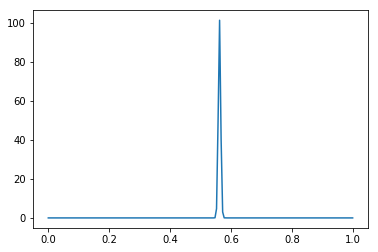

9010 7008


In [52]:
%matplotlib inline 
from scipy.stats import beta


x = np.linspace(0, 1, 200)

y = beta.pdf(x, bandits.a, bandits.b)
plt.plot(x, y)
plt.show()

print(bandits.a, bandits.b)


In [4]:
df_data.head()

,Open,High,Low,Volume,Close,KRW_Close,CNY_Close,13week_Close,5yr_Close,10yr_Close,...,OpenOrg,HighOrg,LowOrg,VolumeOrg,CloseOrg,pct_change,bench,actions,gains,gains2
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-07,77500.0,77500.0,74100.0,125411.0,74100.0,1114.400024,6.8684,2.353,2.519,2.682,...,77500.0,77500.0,74100.0,125411.0,74100.0,0.000000,0.000000,3,0.000000,0.000000
2019-01-08,75200.0,75400.0,74300.0,87817.0,74600.0,1116.400024,6.8500,2.400,2.571,2.716,...,75200.0,75400.0,74300.0,87817.0,74600.0,0.006748,0.006748,1,0.000000,0.000000
2019-01-09,74700.0,76600.0,74600.0,106746.0,76100.0,1121.050049,6.8522,2.390,2.559,2.728,...,74700.0,76600.0,74600.0,106746.0,76100.0,0.020107,0.026855,4,0.000000,0.000000
2019-01-10,75000.0,76500.0,74800.0,170557.0,75300.0,1118.670044,6.8156,2.375,2.559,2.731,...,75000.0,76500.0,74800.0,170557.0,75300.0,-0.010512,0.016342,2,0.009383,0.009383
2019-01-11,75300.0,77100.0,74500.0,122388.0,76800.0,1116.550049,6.7875,2.370,2.525,2.701,...,75300.0,77100.0,74500.0,122388.0,76800.0,0.019920,0.036263,1,0.009383,0.009383
